## 1. Introduction
<p>Everyone loves Lego (unless you ever stepped on one). Did you know by the way that "Lego" was derived from the Danish phrase leg godt, which means "play well"? Unless you speak Danish, probably not. </p>
<p>In this project, we will analyze a fascinating dataset on every single lego block that has ever been built!</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/lego-bricks.jpeg" alt="lego"></p>

In [42]:
# Nothing to do here

## 2. Reading Data
<p>A comprehensive database of lego blocks is provided by <a href="https://rebrickable.com/downloads/">Rebrickable</a>. The data is available as csv files and the schema is shown below.</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/downloads_schema.png" alt="schema"></p>
<p>Let us start by reading in the colors data to get a sense of the diversity of lego sets!</p>

In [44]:
# Import modules
import pandas as pd

# Read colors data
colors = pd.read_csv('datasets/colors.csv')

# Print the first few rows
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


## 3. Exploring Colors
<p>Now that we have read the <code>colors</code> data, we can start exploring it! Let us start by understanding the number of colors available.</p>

In [46]:
# How many distinct colors are available?
# -- YOUR CODE FOR TASK 3 --

## dimentions of the colors DataFrame
colors.shape # 135 rows and 4 columns

# get the number of missing data points per column
missing_values_count = colors.isnull().sum()
missing_values_count # no missing values - dataset is clean

# count number of distinct colors
col_list = colors["name"].value_counts()
num_colors = sum(col_list)
num_colors


135

## 4. Transparent Colors in Lego Sets
<p>The <code>colors</code> data has a column named <code>is_trans</code> that indicates whether a color is transparent or not. It would be interesting to explore the distribution of transparent vs. non-transparent colors.</p>

In [48]:
# colors_summary: Distribution of colors based on transparency
# -- YOUR CODE FOR TASK 4 --

trans_col = colors.groupby('is_trans')
# Summarize colors based on whether they are transparent or not?
colors_summary = trans_col.count()
colors_summary


,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


## 5. Explore Lego Sets
<p>Another interesting dataset available in this database is the <code>sets</code> data. It contains a comprehensive list of sets over the years and the number of parts that each of these sets contained. </p>
<p><img src="https://imgur.com/1k4PoXs.png" alt="sets_data"></p>
<p>Let us use this data to explore how the average number of parts in Lego sets has varied over the years.</p>

             set_num                                               name  year  \
0               00-1                                    Weetabix Castle  1970   
1             0011-2                                  Town Mini-Figures  1978   
2             0011-3                         Castle 2 for 1 Bonus Offer  1987   
3             0012-1                                 Space Mini-Figures  1979   
4             0013-1                                 Space Mini-Figures  1979   
5             0014-1                                 Space Mini-Figures  1979   
6             0015-1                                 Space Mini-Figures  1979   
7             0016-1                                Castle Mini Figures  1978   
8               00-2                       Weetabix Promotional House 1  1976   
9               00-3                       Weetabix Promotional House 2  1976   
10              00-4                      Weetabix Promotional Windmill  1976   
11             005-1        

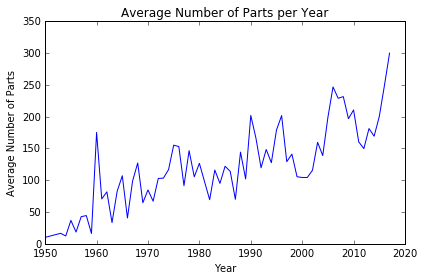

In [50]:
%matplotlib inline
# Read sets data as `sets`
sets = pd.read_csv('datasets/sets.csv')
print(sets)

# Create a summary of average number of parts by year: `parts_by_year`
parts_by_year = sets[['year','num_parts']].groupby('year', as_index=False).mean().round(2)
print(parts_by_year)
# Plot trends in average number of parts by year
import matplotlib.pyplot as plt
plt.plot('year', 'num_parts', data = parts_by_year)
plt.xlabel('Year')
plt.ylabel('Average Number of Parts')
plt.title('Average Number of Parts per Year')
plt.show()


## 6. Lego Themes Over Years
<p>Lego blocks ship under multiple <a href="https://shop.lego.com/en-US/Themes">themes</a>. Let us try to get a sense of how the number of themes shipped has varied over the years.</p>

In [61]:
# themes_by_year: Number of themes shipped by year
# -- YOUR CODE HERE --

themes_by_year = sets[['year','theme_id']].groupby('year', as_index=False).min()
print(themes_by_year)

    year  theme_id
0   1950       366
1   1953       371
2   1954       371
3   1955       370
4   1956       371
5   1957       366
6   1958       366
7   1959       366
8   1960       371
9   1961       371
10  1962       252
11  1963       367
12  1964       367
13  1965       366
14  1966       235
15  1967       235
16  1968       235
17  1969       234
18  1970       234
19  1971       235
20  1972       234
21  1973       363
22  1974       234
23  1975       235
24  1976       233
25  1977         4
26  1978         4
27  1979         4
28  1980         4
29  1981         4
..   ...       ...
36  1988         6
37  1989         1
38  1990        12
39  1991         6
40  1992         1
41  1993         1
42  1994         1
43  1995         1
44  1996         1
45  1997         1
46  1998         1
47  1999         1
48  2000         1
49  2001         1
50  2002         1
51  2003         1
52  2004         6
53  2005         7
54  2006         1
55  2007         7
56  2008    

## 7. Wrapping It All Up!
<p>Lego blocks offer an unlimited amount of fun across ages. We explored some interesting trends around colors, parts, and themes. </p>

In [54]:
# Nothing to do here